

# Project: Investigate TMDB-Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected fromThe Movie Database (TMDb),including user ratings and revenue
### Questions of the analysis
- Research Question 1 (What is the year with least and most Number of movies?)
- Research Question 2 (What are the TOP 10 Movies with highest revenue ?)
- Research Question 3 ( What is the Average , Maximum , Minimum vote rating each year ?)
- Research Question 4 (what is the total budget every year ?)
- Research Question 5 (what is budget vs revenue per movie ?)
- Research Question 6 (Which month has the highest number of movies ?)

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.duplicated().sum()

1

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

## Data Cleaning

### removing columns that will not be used in the analysis

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['imdb_id' , 'budget_adj' , 'revenue_adj' , 'homepage' ,'id' , 'tagline' ,'keywords' , 'production_companies']
       ,axis = 1 , inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   overview        10862 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_count      10866 non-null  int64  
 11  vote_average    10866 non-null  float64
 12  release_year    10866 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


### droping duplicated rows

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

### converting release_date from object to date_time

In [12]:
df.release_date = pd.to_datetime(df.release_date)

### droping null values

In [13]:
#droping null values
df.dropna(inplace= True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10729 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10729 non-null  float64       
 1   budget          10729 non-null  int64         
 2   revenue         10729 non-null  int64         
 3   original_title  10729 non-null  object        
 4   cast            10729 non-null  object        
 5   director        10729 non-null  object        
 6   overview        10729 non-null  object        
 7   runtime         10729 non-null  int64         
 8   genres          10729 non-null  object        
 9   release_date    10729 non-null  datetime64[ns]
 10  vote_count      10729 non-null  int64         
 11  vote_average    10729 non-null  float64       
 12  release_year    10729 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 1.1+ MB


### showing histogram of the whole dataframe

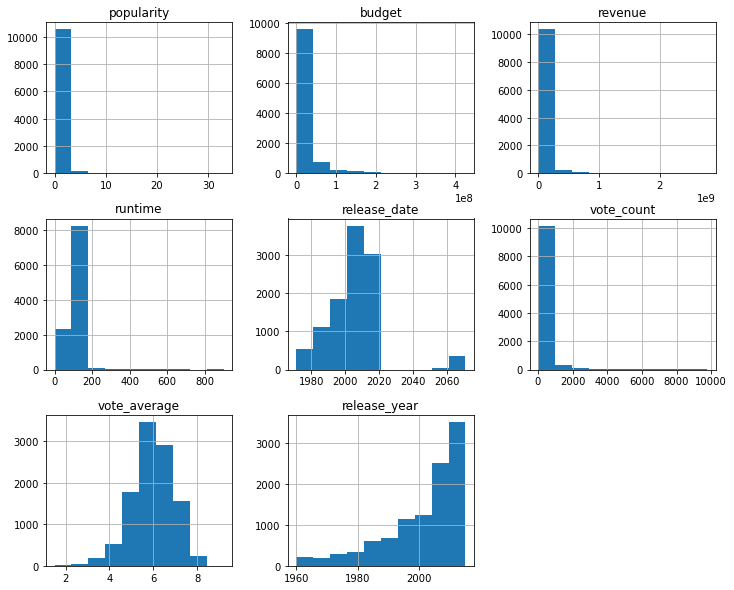

In [15]:
df.hist(figsize = (12,10));

**As indicated in above plots**

each plot represents a numiric or date **column** in the data set

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What is the year with least and most Number of movies?)

In [16]:
# grouping and counting the number of movies by their release year 
movies_per_year = df.groupby('release_year').count()['release_date']
#cheking the top five values of the data 
movies_per_year.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: release_date, dtype: int64

In [17]:
#cheking the least five values of the data 
movies_per_year.tail()

release_year
2011    530
2012    574
2013    649
2014    682
2015    617
Name: release_date, dtype: int64

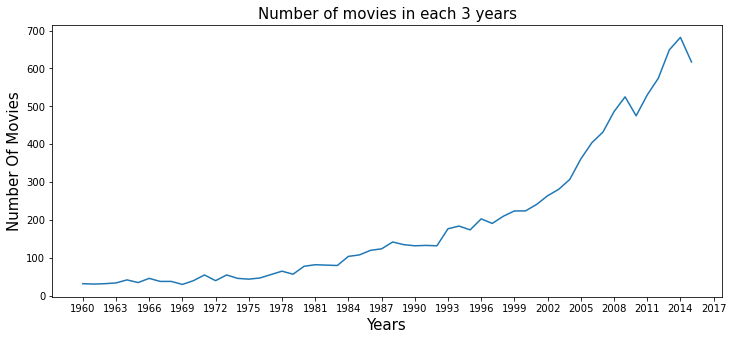

In [18]:
#ploting line plot with 3 years intervel from 1960 to 2016
movies_per_year.plot( figsize=(12,5) ,xticks = np.arange(1960,2020,3))
plt.xlabel('Years' , fontsize= 15)
plt.ylabel('Number Of Movies' , fontsize= 15)
plt.title('Number of movies in each 3 years' , fontsize= 15)
plt.show;

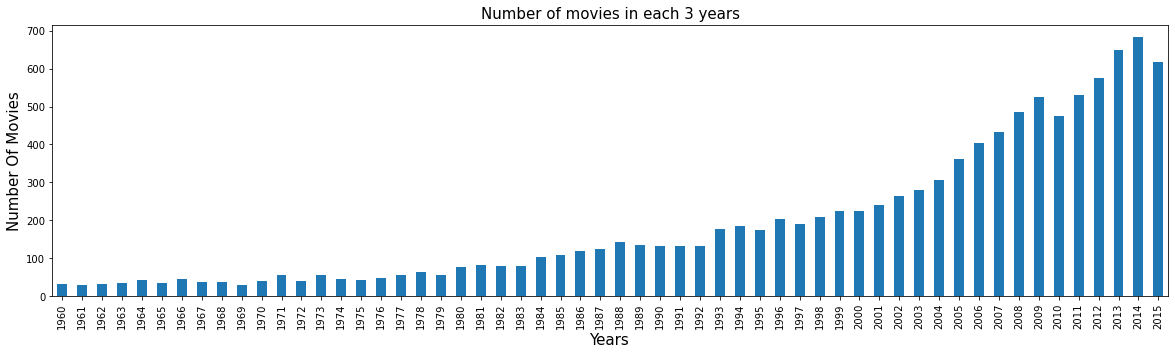

In [19]:
#plotting the same data with bar chart for every single year of the data
movies_per_year.plot(kind= 'bar', figsize=(20,5))
plt.xlabel('Years' , fontsize= 15)
plt.ylabel('Number Of Movies' , fontsize= 15)
plt.title('Number of movies in each 3 years' , fontsize= 15)
plt.show;

**As indicated in above *two* plots**

the year with the least number of movies is **1961** with **31** movie

the year with the most number of movies is **2014** with **682**movie

### Research Question 2  (What are the TOP 10 Movies with highest revenue ?)

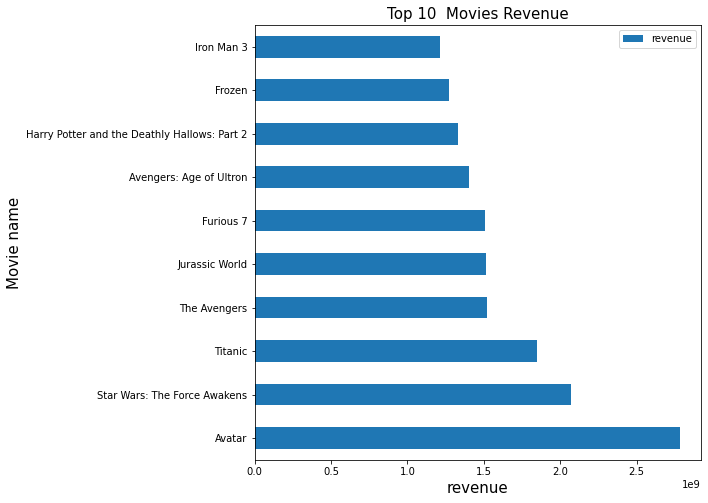

In [20]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate

# creating a sum dataframe from original_title and revenue 
movies_revenue = df[['original_title','revenue']]
# sorting the data with the highest revenue first
movies_revenue_sorted = movies_revenue.sort_values('revenue' , ascending= False )
# plotting the firest 10 movies in the data as horizontal bar chart
movies_revenue_sorted.iloc[:10].plot(x ='original_title' , kind = 'barh', figsize = (8,8))
plt.xlabel('revenue' , fontsize= 15)
plt.ylabel('Movie name' , fontsize= 15)
plt.title('Top 10  Movies Revenue' , fontsize= 15)
plt.show;

**As indicated in above plot**

**Avatar** is the highest revenu movie in the data set

### Research Question 3  ( What is the Average , Maximum ,  Minimum vote rating each year ?)

In [21]:
# making a function that group data by release year and average vote
def Group_by_year_vote_average (df):
    df1 =df.groupby('release_year')['vote_average']
    return df1

### Average rating per year

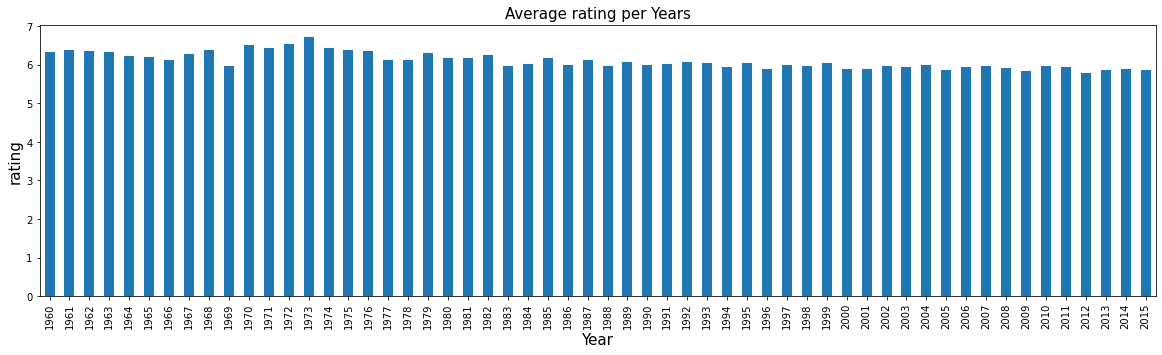

In [22]:
# taking the mean of the data
average_rating_per_year = Group_by_year_vote_average(df).mean()
average_rating_per_year.plot(kind='bar',figsize = (20,5))
plt.title('Average rating per Years', fontsize= 15)
plt.xlabel('Year' , fontsize= 15)
plt.ylabel('rating' , fontsize= 15);

**As indicated in above plot**

The **Averege** rating throw the whole years was around **6** to **7**

### Maximum rating per year

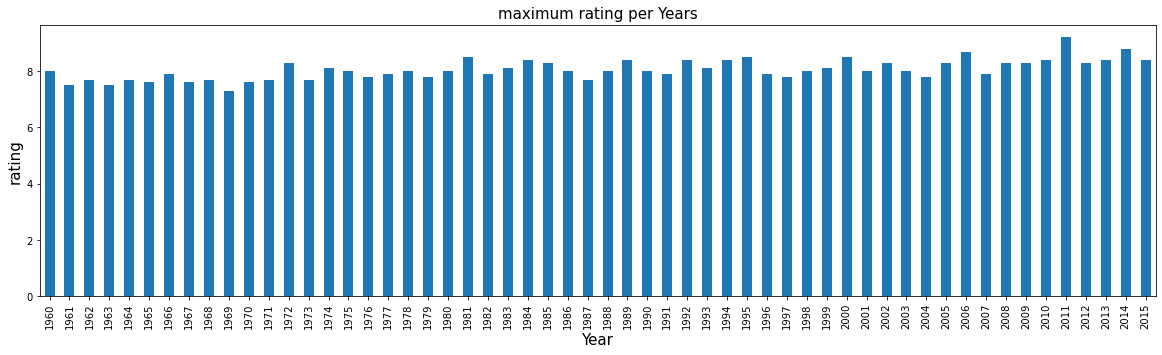

In [23]:
#taking the max of the data
max_rating_per_year = Group_by_year_vote_average(df).max()
max_rating_per_year.plot(kind='bar',figsize = (20,5))
plt.title('maximum rating per Years' ,  fontsize= 15)
plt.xlabel('Year' , fontsize= 15)
plt.ylabel('rating' , fontsize= 15);

**As indicated in above plot**

The **Maximum** rating throw the whole years was around **8**

### Minimum rating per year

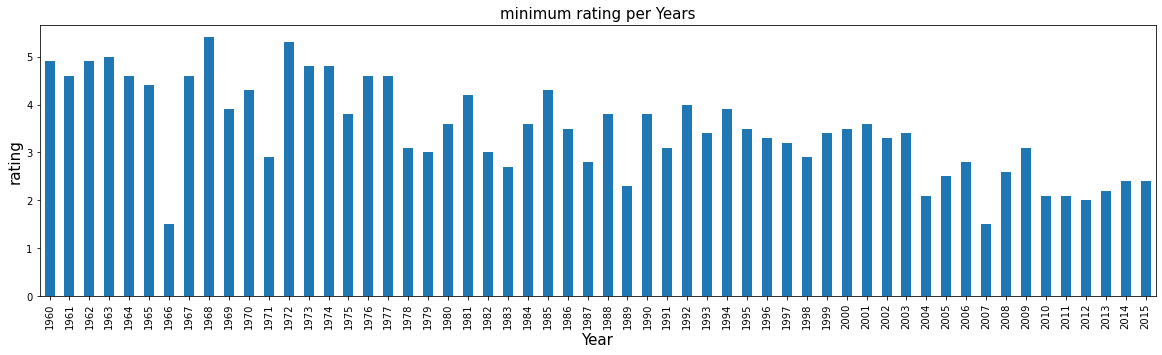

In [24]:
#taking the min of the data
min_rating_per_year = Group_by_year_vote_average(df).min()
#plotting the data as bar chart
min_rating_per_year.plot(kind='bar',figsize = (20,5))
plt.title('minimum rating per Years', fontsize= 15)
plt.xlabel('Year' , fontsize= 15)
plt.ylabel('rating' , fontsize= 15)
plt.show();

**As indicated in above plot**

The **Minimum** rating was the lowest in ***1969*** and ***2007*** between **1** and **2**

## Research Question 4 (what is the total budget every year ?)

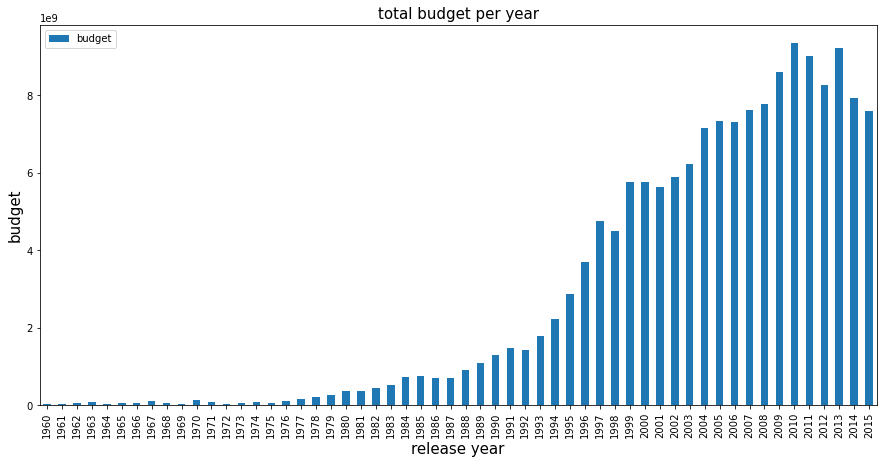

In [25]:
# filtering data with badjet not equal 0
df1 =df.query('budget != 0')
# grouping the data with release year and the total budget
grouped_year_budget = df1.groupby('release_year').budget.sum()
df_grouped_year = grouped_year_budget.to_frame()
#plotting the data as bar chart
df_grouped_year.plot.bar(figsize = (15,7) , y = 'budget' )
plt.title('total budget per year' , fontsize= 15)
plt.xlabel('release year', fontsize= 15)
plt.ylabel('budget', fontsize= 15)
plt.show();

**As indicated in above plot**

the total budget per year **increased** alot in the ***last 20 years*** of the data

## Research Question 5 (what is budget vs revenue per movie ?)

In [26]:
# removing zero values from budget and revenue
df_non_zero = df.query('revenue != 0 and budget != 0')
# cheking there is no zero valeus
df_non_zero.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000
mean,1.192933,3.724886e+07,1.078148e+08,109.217459,528.387114,6.168693,2001.258249
std,1.475622,4.221699e+07,1.766175e+08,19.914141,880.333629,0.794697,11.285642
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,0.463337,1.000000e+07,1.367069e+07,95.000000,71.000000,5.700000,1995.000000
50%,0.798582,2.400000e+07,4.490726e+07,106.000000,205.000000,6.200000,2004.000000
75%,1.374300,5.000000e+07,1.243052e+08,119.000000,581.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


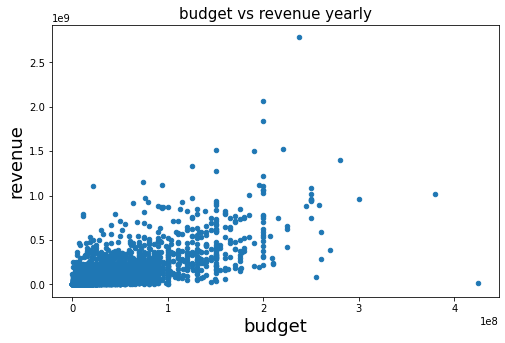

In [27]:
#ploting the Scatter plot for budget and revenu
df_non_zero.plot.scatter( x = 'budget' , y = 'revenue' , figsize = (8,5))
plt.title('budget vs revenue yearly' , fontsize= 15)
plt.xlabel('budget' , fontsize = 18 )
plt.ylabel('revenue' , fontsize = 18)
plt.show;

**As indicated in above plot**

Due to the **positive** correlation between *budget* and *revenu*

So if the budget **incresed** in the movie the **more** the revenu **increase** in normal conditions

## Research Question 6 (Which month has the highest number of movies ?)

In [28]:
# adding month of release column to the data frame
df['month_of_realese'] = df['release_date'].dt.month

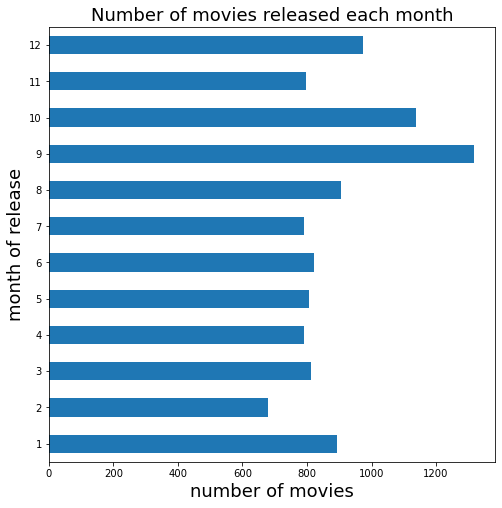

In [29]:
# counting the movies per month and ploting a bar chart to indicate how many movies released each month
df.groupby('month_of_realese').original_title.count().plot.barh(figsize = (8,8))
plt.title('Number of movies released each month' , fontsize = 18)
plt.xlabel('number of movies' , fontsize = 18)
plt.ylabel('month of release' , fontsize = 18)
plt.show();

**As indicated in above plot**

The **month** with the **highest** number of movies is ***September***

<a id='conclusions'></a>
# Conclusions
- ## Answering the questions 
 - ### Research Question 1 ((What is the year with least and most Number of movies?)
   - #### the year with the least number of movies is 1961 with 31 movie
   - #### the year with the most number of movies is 2014 with 682 movie
 - ### Research Question 2 (What are the TOP 10 Movies with highest revenue ?)
   - #### 1 Avatar with 2781505847 doller revenu
   - #### 2 Star Wars: The Force Awakens with 2068178225 doller revenu
   - #### 3 Titanic with 1845034188 doller revenu
   - #### 4 The Avengers with 1519557910 doller revenu
   - #### 5 Jurassic World with 1513528810 doller revenu
   - #### 6 Furious 7 with 1506249360 doller revenu
   - #### 7 Avengers: Age of Ultron	with 1405035767 doller revenu
   - #### 8 Harry Potter and the Deathly Hallows: Part 2 with 1327817822 doller revenu
   - #### 9 Frozen with 1274219009 doller revenu
   - #### 10 Iron Man 3	with 1215439994 doller revenu
 - ### Research Question 3 ( What is the Average , Maximum , Minimum vote rating each year ?)
    #### as shown in the plots 
   - #### the Averege throw the whole years was around 6 to 7 
   - #### the maximum  throw the whole years was around 8
   - #### the minimum was the lowest in 1969 and 2007 between 1 and 2
 - ### Research Question 4 (what is the total budget every year ?)
    #### as shown in the plot the total budget per year increased dramaticly in the last 20 years of the data
 - ### Research Question 5 (what is budget vs revenue per movie ?)
    #### as shown in the plot there is a positive correlation between budget and revenu , So if the budget incresed in the movie the more the revenu increase in normal conditions
 - ### Research Question 6 (Which month has the highest number of movies ?)
    #### as shown in the plot the month with the most number of movies is September
    
## Limitations

- #### the analysis related to budget and revenue could not be that accurate, because there more than half of the movies with revenue or budget with value ( 0 ), so I removed the in the analysis related to budget and revenue


- #### the genres data for each movie seperated by vertical bars ( | ) so if i wanted to do analysis on it , it should be seperated into list of genres for each movie and it will be a little more complex to analyze
